In [16]:
# import txt file library
library("readr")
library("ggplot2")
library("tidyr")
library("dplyr")

In [17]:
# import txt file
data <- read_tsv("GENDER_EMP_19032023152556091.txt", show_col_types = FALSE)

# filter SEX to its just MEN and WOMEN
data <- data %>% filter(SEX == "MEN" | SEX == "WOMEN")
# filter data so EMP3 is in IND column
data <- data %>% filter(IND == "EMP3")
# filter data so AGE is 1524, 2554, 5564
data <- data %>% filter(AGE == "1524" | AGE == "2554" | AGE == "5564")
# Registados em 2010
data <- data %>% filter(TIME == "2010")
# Sweden
data <- data %>% filter(COU == "SWE")

data


COU,Country,IND,Indicator,SEX,Sex,AGE,Age Group,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<lgl>,<lgl>,<dbl>,<chr>,<chr>
SWE,Sweden,EMP3,"Unemployment rate, by sex and age group",WOMEN,Women,1524,15-24,2010,2010,PC,Percentage,0,Units,NA,NA,23.6,NA,NA
SWE,Sweden,EMP3,"Unemployment rate, by sex and age group",MEN,Men,1524,15-24,2010,2010,PC,Percentage,0,Units,NA,NA,25.9,NA,NA
SWE,Sweden,EMP3,"Unemployment rate, by sex and age group",MEN,Men,2554,25-54,2010,2010,PC,Percentage,0,Units,NA,NA,6.3,NA,NA
SWE,Sweden,EMP3,"Unemployment rate, by sex and age group",WOMEN,Women,2554,25-54,2010,2010,PC,Percentage,0,Units,NA,NA,6.6,NA,NA
SWE,Sweden,EMP3,"Unemployment rate, by sex and age group",MEN,Men,5564,55-64,2010,2010,PC,Percentage,0,Units,NA,NA,6.6,NA,NA
SWE,Sweden,EMP3,"Unemployment rate, by sex and age group",WOMEN,Women,5564,55-64,2010,2010,PC,Percentage,0,Units,NA,NA,4.8,NA,NA


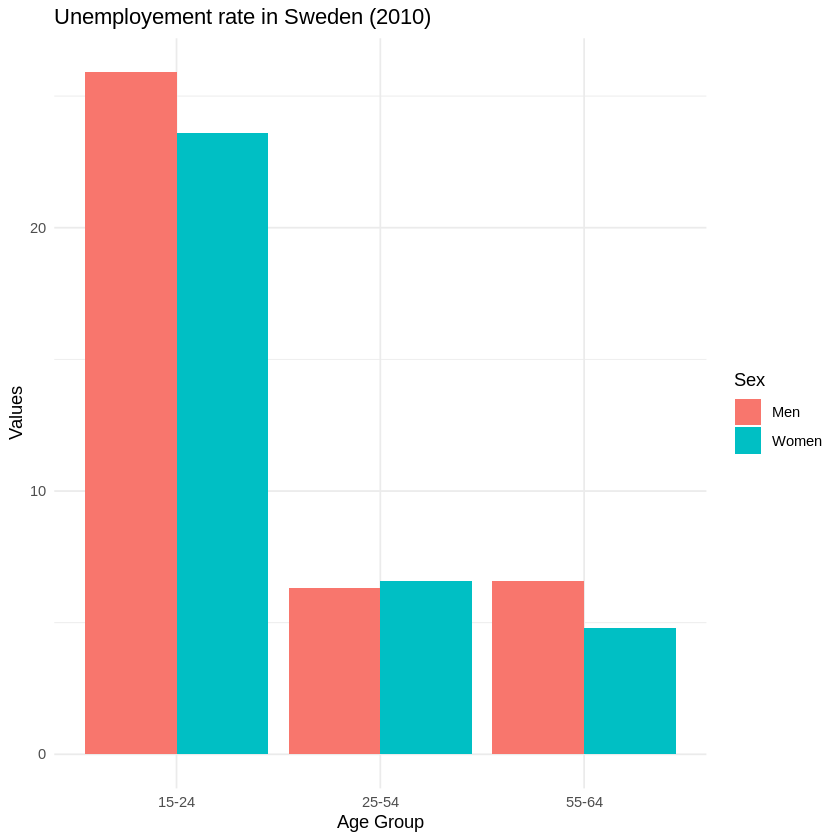

In [18]:
#Organize data frame to be used in ggplot
dados <- data.frame(
  Age_Group = factor(c("15-24", "15-24", "25-54", "25-54", "55-64", "55-64"), 
                     levels = c("15-24", "25-54", "55-64")),
  Sex = factor(c("Women", "Men", "Men", "Women", "Men", "Women"),
               levels = c("Men", "Women")),
  EMP3 = c(data$Value[1], data$Value[2], data$Value[3], data$Value[4], data$Value[5], data$Value[6]))
  

# Criar o gráfico de barras usando ggplot2
grafico <- ggplot(dados, aes(x = Age_Group, y = EMP3, fill = Sex)) +
  geom_bar(stat = "identity", position = "dodge") +
  theme_minimal() +
  labs(title = "Unemployement rate in Sweden (2010)",
       x = "Age Group",
       y = "Values",
       fill = "Sex")


# Mostrar o gráfico
grafico

